# Load data into Spark DataFrame

In [6]:
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql import Row
from pyspark.sql import functions
from pyspark.sql.types import *
from pyspark.sql.functions import *

In [7]:
import pyspark.sql.functions as F

In [8]:
# We use matplotlib for plotting
import matplotlib.pyplot as plt

# This statement allow to display plot without asking to
%matplotlib inline

In [9]:
spark = SparkSession \
    .builder \
    .appName("MusicBox Capstone") \
    .getOrCreate()

In [10]:
df = spark.read.csv('/Users/cheng/Desktop/music/event_ds.csv',header=True).cache()
df

DataFrame[uid: string, event: string, song_id: string, date: string]

In [11]:
df.show()

+---------+-----+-------+----------+
|      uid|event|song_id|      date|
+---------+-----+-------+----------+
|154711780|    P|4540711|2017-03-03|
|154830377|    P| 999306|2017-03-03|
|154418332|    P|2318500|2017-03-03|
|154790782|    P|6355375|2017-03-03|
|154559815|    P|7065640|2017-03-03|
|154715018|    P|3967170|2017-03-03|
|154479534|    P|4781125|2017-03-03|
|154816171|    P|6459954|2017-03-03|
|154562654|    P| 225712|2017-03-03|
|154479534|    P|4720145|2017-03-03|
|154418820|    P|6204148|2017-03-03|
|154418820|    P|6204148|2017-03-03|
|154418820|    P|6204148|2017-03-03|
|154833706|    P|1216165|2017-03-03|
|154426409|    P|9929254|2017-03-03|
|154418820|    P|6204148|2017-03-03|
|154820284|    P|3221495|2017-03-03|
|154479534|    P|4720145|2017-03-03|
|154528712|    P|      0|2017-03-03|
|154833469|    P|6689180|2017-03-03|
+---------+-----+-------+----------+
only showing top 20 rows



In [12]:
# overwrite date column
df = df.withColumn('date',F.col('date').cast('date'))

# show schema
df

DataFrame[uid: string, event: string, song_id: string, date: date]

In [13]:
df.show()

+---------+-----+-------+----------+
|      uid|event|song_id|      date|
+---------+-----+-------+----------+
|154711780|    P|4540711|2017-03-03|
|154830377|    P| 999306|2017-03-03|
|154418332|    P|2318500|2017-03-03|
|154790782|    P|6355375|2017-03-03|
|154559815|    P|7065640|2017-03-03|
|154715018|    P|3967170|2017-03-03|
|154479534|    P|4781125|2017-03-03|
|154816171|    P|6459954|2017-03-03|
|154562654|    P| 225712|2017-03-03|
|154479534|    P|4720145|2017-03-03|
|154418820|    P|6204148|2017-03-03|
|154418820|    P|6204148|2017-03-03|
|154418820|    P|6204148|2017-03-03|
|154833706|    P|1216165|2017-03-03|
|154426409|    P|9929254|2017-03-03|
|154418820|    P|6204148|2017-03-03|
|154820284|    P|3221495|2017-03-03|
|154479534|    P|4720145|2017-03-03|
|154528712|    P|      0|2017-03-03|
|154833469|    P|6689180|2017-03-03|
+---------+-----+-------+----------+
only showing top 20 rows



# Some exploration

In [14]:
# simple count rows
df.count()

15823767

In [15]:
# select operation, count distinct rows
df.select('uid').distinct().count()

77933

In [16]:
# group by aggregation
df.groupBy('event').count().show()

+-----+--------+
|event|   count|
+-----+--------+
|    D|  678672|
|    S|  880637|
|    P|14264458|
+-----+--------+



In [17]:
# group by aggregation, more general (count, min, max, mean), multiple at once
df.groupBy('event').agg(
    F.count(F.col('uid')).alias('count'),
    F.max(F.col('uid')).alias('max_uid')
).show()

+-----+--------+--------+
|event|   count| max_uid|
+-----+--------+--------+
|    D|  678672|61505575|
|    S|  880637|61352192|
|    P|14264458|61624497|
+-----+--------+--------+



In [62]:
# filter operation
# group by aggregation
# order by operation
df.filter((F.col('date')>='2017-04-01') & (F.col('date')<='2017-04-05')) \
                    .groupBy('date','event').count() \
                    .orderBy('date','event').show()

+----------+-----+------+
|      date|event| count|
+----------+-----+------+
|2017-04-01|    D| 35752|
|2017-04-01|    P|582518|
|2017-04-01|    S| 37659|
|2017-04-02|    D| 27452|
|2017-04-02|    P|531027|
|2017-04-02|    S| 33710|
|2017-04-03|    D| 23285|
|2017-04-03|    P|326135|
|2017-04-03|    S| 29988|
|2017-04-04|    D| 24366|
|2017-04-04|    P|454003|
|2017-04-04|    S| 28225|
|2017-04-05|    D| 20724|
|2017-04-05|    P|374204|
|2017-04-05|    S| 24013|
+----------+-----+------+



In [63]:
date_count = df.groupBy('date').count().toPandas()

(array([736390., 736404., 736418., 736432., 736446., 736460.]),
 <a list of 6 Text xticklabel objects>)

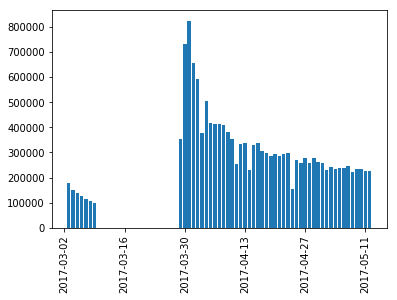

In [64]:
plt.bar(date_count['date'],date_count['count'])
plt.xticks(rotation='vertical')

# Label definition

In [65]:
import datetime
from dateutil import parser

label_window_size = 14
label_window_end_date = parser.parse('2017-05-12').date()
label_window_start_date = label_window_end_date - datetime.timedelta(label_window_size - 1)
print('label window:',label_window_start_date,'~',label_window_end_date,'days:',label_window_size)

feature_window_size = 14
feature_window_end_date = label_window_start_date - datetime.timedelta(1)
feature_window_start_date = feature_window_end_date  - datetime.timedelta(feature_window_size - 1)
print('feature window:',feature_window_start_date,'~',feature_window_end_date,'days:',feature_window_size)

label window: 2017-04-29 ~ 2017-05-12 days: 14
feature window: 2017-04-15 ~ 2017-04-28 days: 14


In [66]:
# all the uid we will model
df_model_uid = df.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))\
                    .select('uid').distinct()
# active in label window (active label=0)
df_active_uid_in_label_window = df.filter((F.col('date')>=label_window_start_date) & (F.col('date')<=label_window_end_date))\
                            .select('uid').distinct().withColumn('label',F.lit(0))

In [67]:
# prepare label data (churn label=1; active label=0)
df_label = df_model_uid.join(df_active_uid_in_label_window,on=['uid'],how='left')
df_label = df_label.fillna(1)

In [68]:
# churn labeled as '1', non-churn as '0'
df_label.groupBy('label').count().show()

+-----+-----+
|label|count|
+-----+-----+
|    1| 9540|
|    0|21515|
+-----+-----+



# Feature generation

In [25]:
# event_data in feature_window
df_feature_window = df.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))

### Frequency features

##### method 1

In [26]:
# define a function to generate frequency features
def frequency_feature_generation(df,event,time_window,snapshot_date):
    """
    generate frequency features for one event type and one time window
    """
    df_feature = df.filter(F.col('event')==event)\
            .filter((F.col('date')>=snapshot_date-datetime.timedelta(time_window-1)) & (F.col('date')<=snapshot_date))\
            .groupBy('uid').agg(F.count(F.col('uid')).alias('freq_'+event+'_last_'+str(time_window)))
    return df_feature

In [27]:
# generate one feature
event = 'S'
time_window = 3
snapshot_date = feature_window_end_date
df_feature = frequency_feature_generation(df_feature_window,event,time_window,snapshot_date)

In [28]:
df_feature.show(5)

+---------+-------------+
|      uid|freq_S_last_3|
+---------+-------------+
|167635050|           27|
|167935507|           10|
|168045197|            1|
|167779001|            5|
|167570402|            1|
+---------+-------------+
only showing top 5 rows



In [29]:
# generate frequency features for all event_list, time_window_list
event_list = ['P','D','S']
time_window_list = [1,3,7,14,30]
df_feature_list = []
for event in event_list:
    for time_window in time_window_list:
        df_feature_list.append(frequency_feature_generation(df_feature_window,event,time_window,snapshot_date))


In [30]:
df_feature_list

[DataFrame[uid: string, freq_P_last_1: bigint],
 DataFrame[uid: string, freq_P_last_3: bigint],
 DataFrame[uid: string, freq_P_last_7: bigint],
 DataFrame[uid: string, freq_P_last_14: bigint],
 DataFrame[uid: string, freq_P_last_30: bigint],
 DataFrame[uid: string, freq_D_last_1: bigint],
 DataFrame[uid: string, freq_D_last_3: bigint],
 DataFrame[uid: string, freq_D_last_7: bigint],
 DataFrame[uid: string, freq_D_last_14: bigint],
 DataFrame[uid: string, freq_D_last_30: bigint],
 DataFrame[uid: string, freq_S_last_1: bigint],
 DataFrame[uid: string, freq_S_last_3: bigint],
 DataFrame[uid: string, freq_S_last_7: bigint],
 DataFrame[uid: string, freq_S_last_14: bigint],
 DataFrame[uid: string, freq_S_last_30: bigint]]

##### method 2: too many dfs to join? do it another way

In [31]:
# define a function to generate frequency features for a list of time windows
# using when().otherwise(), and list comprehension trick!
def frequency_feature_generation_time_windows(df,event,time_window_list,snapshot_date):
    """
    generate frequency features for one event type and a list of time windows
    """
    df_feature = df \
        .filter(F.col('event')==event) \
        .groupBy('uid') \
        .agg(*[F.sum(F.when((F.col('date')>=snapshot_date-datetime.timedelta(time_window-1)) & (F.col('date')<=snapshot_date),1).otherwise(0)).alias('freq_'+event+'_last_'+str(time_window)) \
                for time_window in time_window_list]
            )# *[] opens list and make them comma separated
    return df_feature

In [32]:
# generate one event type, all time windows 
event = 'S'
time_window_list = [1,3,7,14,30]
snapshot_date = feature_window_end_date
df_feature = frequency_feature_generation_time_windows(df_feature_window,event,time_window_list,snapshot_date)
df_feature.show(5)

+---------+-------------+-------------+-------------+--------------+--------------+
|      uid|freq_S_last_1|freq_S_last_3|freq_S_last_7|freq_S_last_14|freq_S_last_30|
+---------+-------------+-------------+-------------+--------------+--------------+
|167993779|            0|            0|            1|             6|            56|
|167899727|            0|            0|            0|             0|            41|
|167794404|            0|            0|            0|             1|            12|
|167838398|            0|            0|            0|             0|             7|
|167935507|            6|           10|           33|            91|           222|
+---------+-------------+-------------+-------------+--------------+--------------+
only showing top 5 rows



In [33]:
# generate frequency features for all event_list, time_window_list
event_list = ['P','D','S']
time_window_list = [1,3,7,14,30]
df_feature_list = []
for event in event_list:
    df_feature_list.append(frequency_feature_generation_time_windows(df_feature_window,event,time_window_list,snapshot_date))


In [34]:
df_feature_list

[DataFrame[uid: string, freq_P_last_1: bigint, freq_P_last_3: bigint, freq_P_last_7: bigint, freq_P_last_14: bigint, freq_P_last_30: bigint],
 DataFrame[uid: string, freq_D_last_1: bigint, freq_D_last_3: bigint, freq_D_last_7: bigint, freq_D_last_14: bigint, freq_D_last_30: bigint],
 DataFrame[uid: string, freq_S_last_1: bigint, freq_S_last_3: bigint, freq_S_last_7: bigint, freq_S_last_14: bigint, freq_S_last_30: bigint]]

### Profile features

In [36]:
df_play = spark.read.csv('/Users/cheng/Desktop/music/play_ds.csv',header=True)
df_play.show(5)

+---------+------+-------+----------+---------+-----------+
|      uid|device|song_id|      date|play_time|song_length|
+---------+------+-------+----------+---------+-----------+
|154711780|    ar|4540711|2017-03-03|      178|        178|
|154830377|    ar| 999306|2017-03-03|      251|        252|
|154418332|    ar|2318500|2017-03-03|        9|        294|
|154790782|    ar|6355375|2017-03-03|      265|        266|
|154559815|    ar|7065640|2017-03-03|      335|        335|
+---------+------+-------+----------+---------+-----------+
only showing top 5 rows



In [37]:
df_play_feature_window = df_play.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))
df_profile_tmp = df_play_feature_window.select('uid','device').distinct()

In [38]:
df_profile_tmp.groupBy('device').count().show()

+------+-----+
|device|count|
+------+-----+
|    ar|55469|
|    ip| 8305|
+------+-----+



In [39]:
# check if one user has two devices
df_profile_tmp.count()

63774

In [40]:
df_profile_tmp.distinct().count()

63774

In [41]:
df_profile_tmp = df_profile_tmp.withColumn('device_type',F.when(F.col('device')=='ip',1).otherwise(2))
df_profile_tmp.groupBy('device_type').count().show()

+-----------+-----+
|device_type|count|
+-----------+-----+
|          1| 8305|
|          2|55469|
+-----------+-----+



In [42]:
df_profile = df_label.select('uid').join(df_profile_tmp.select('uid','device_type'),on='uid',how='left')
df_profile.groupBy('device_type').count().show()

+-----------+-----+
|device_type|count|
+-----------+-----+
|       null|  404|
|          1| 8305|
|          2|55469|
+-----------+-----+



# Form training data

In [45]:
def join_feature_data(df_master,df_feature_list):
    for df_feature in df_feature_list:
        df_master = df_master.join(df_feature,on='uid',how='left')
        #df_master.persist() # uncomment if number of joins is too many
    return df_master
    

In [46]:
# join all behavior features
df_model_final = join_feature_data(df_label,df_feature_list)

In [47]:
# join all profile features
df_model_final = join_feature_data(df_model_final,[df_profile])

In [48]:
df_model_final.fillna(0).toPandas().to_csv('/Users/cheng/Desktop/music/df_model_final.csv',index=False)